<a href="https://colab.research.google.com/github/Kee-Keerthi002/Personalized-Medicine-Recommending-system/blob/main/Medicine_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

In [ ]:
import os
for dirname, _, filenames in os.walk('Medicine_dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df_med = pd.read_excel("Med_Company.xlsx")
df_med.head()

,S.No,Company_Name,NSE_Symbol,Rating,Industry
0,1,Sun Pharmaceutical Industries Ltd.,SUNPHARMA,S,Pharmaceuticals & Drugs
1,2,Dr. Reddys Laboratories Ltd.,DRREDDY,R,Pharmaceuticals & Drugs
2,3,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
3,4,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
4,5,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs


In [ ]:
df_med.tail()

,S.No,Company_Name,NSE_Symbol,Rating,Industry
22476,22477,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
22477,22478,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
22478,22479,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs
22479,22480,Aurobindo Pharma Ltd.,AUROPHARMA,AU,Pharmaceuticals & Drugs
22480,22481,Torrent Pharmaceuticals Ltd.,TORNTPHARM,T,Pharmaceuticals & Drugs


In [ ]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S.No          22481 non-null  int64 
 1   Company_Name  22481 non-null  object
 2   NSE_Symbol    22481 non-null  object
 3   Rating        22481 non-null  object
 4   Industry      22481 non-null  object
dtypes: int64(1), object(4)
memory usage: 878.3+ KB


In [ ]:
df_des = pd.read_excel("Medicine_description.xlsx")
df_des.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [ ]:
df_des.tail()

,Drug_Name,Reason,Description
22476,T Muce Ointment 5gm,Wound,used for treating warts
22477,Wokadine 10% Solution 100mlWokadine Solution 5...,Wound,used to soften the skin cells
22478,Wokadine M Onit 10gm,Wound,used for scars
22479,Wound Fix Solution 100ml,Wound,used for wounds
22480,Wounsol Ointment 15gm,Wound,used to treat and remove raised warts (usually...


In [ ]:
df_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Drug_Name    22481 non-null  object
 1   Reason       22481 non-null  object
 2   Description  22467 non-null  object
dtypes: object(3)
memory usage: 527.0+ KB


In [ ]:
df_rate = pd.read_excel("Med_Ratings.xlsx")
df_rate.head()

,Short-form,Rating
0,S,4.8
1,R,4.7
2,D,4.5
3,C,4.3
4,B,4.1


In [ ]:
df_rate.tail()

,Short-form,Rating
11,G,3.1
12,I,3.0
13,ALEM,2.9
14,GL,2.7
15,JB,2.5


In [ ]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Short-form  16 non-null     object 
 1   Rating      16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


Dataset has 22479 unique groups
********************
And the top 10 counts are :
M Cold Plus CZ Tablet 10'S                              2
Gefer Capsule 10'S                                      2
A CN Gel(Topical) 20gmA CN Soap 75gm                    1
Doloban SR 100mg Tablet 10'S                            1
Dolochek 200mg Tablet 10'SDolochek 100mg Tablet 10'S    1
Dolocam 20mg Tablet 10'S                                1
Dolobest SR 200mg Tablet 10'S                           1
Dolobest SP Tablet 10'S                                 1
Dolobest P Tablet 10'S                                  1
Dolobest OD 200mg Tablet 10'S                           1
Name: Drug_Name, dtype: int64
********************


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, "M Cold Plus CZ Tablet 10'S"),
  Text(1, 0, "Gefer Capsule 10'S"),
  Text(2, 0, 'A CN Gel(Topical) 20gmA CN Soap 75gm'),
  Text(3, 0, "Doloban SR 100mg Tablet 10'S"),
  Text(4, 0, "Dolochek 200mg Tablet 10'SDolochek 100mg Tablet 10'S"),
  Text(5, 0, "Dolocam 20mg Tablet 10'S"),
  Text(6, 0, "Dolobest SR 200mg Tablet 10'S"),
  Text(7, 0, "Dolobest SP Tablet 10'S"),
  Text(8, 0, "Dolobest P Tablet 10'S"),
  Text(9, 0, "Dolobest OD 200mg Tablet 10'S")])

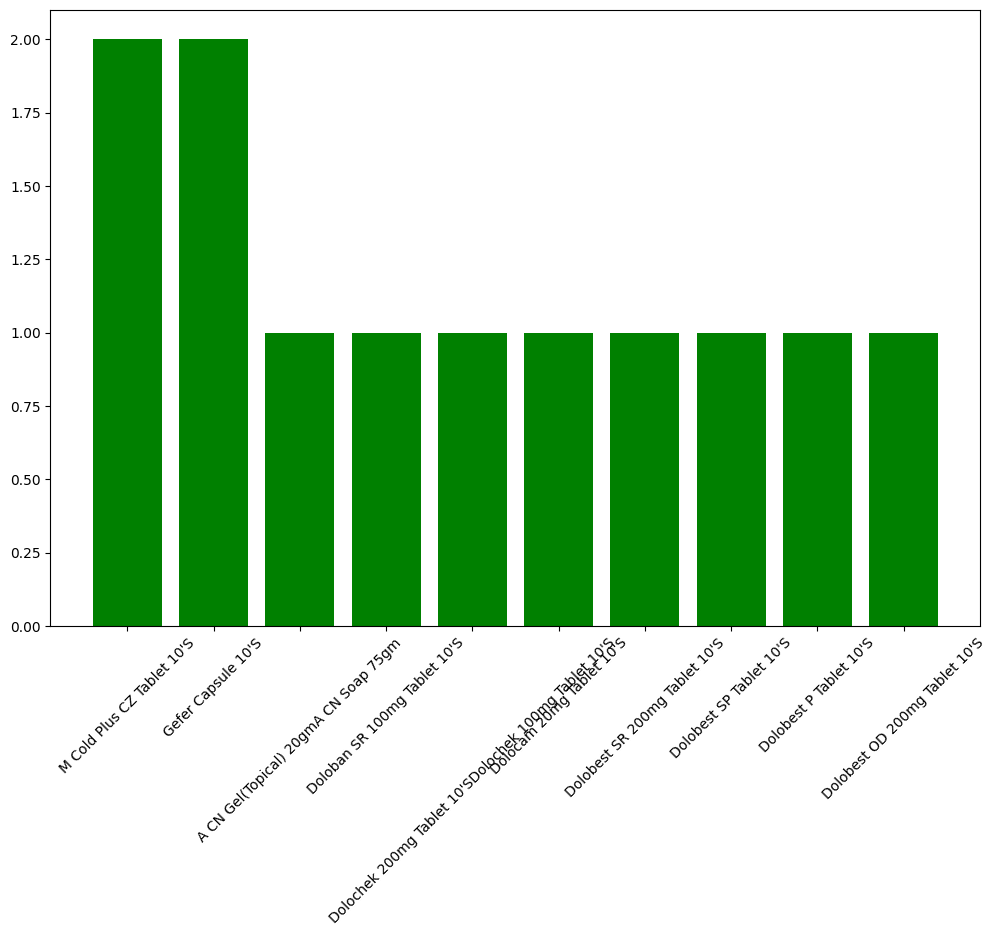

In [ ]:
print(f'Dataset has {len(df_des.Drug_Name.unique())} unique groups')
print('*'*20)
print(f'And the top 10 counts are :')
print(df_des.Drug_Name.value_counts().head(10))
print('*'*20)

c = df_des.Drug_Name.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.bar(c.index, c.values, width=0.8, color='green')
plt.xticks(rotation=45)

Dataset has 51 unique groups
********************
And the top 10 counts are :
Supplement      3913
Pain            2852
Infection       2629
Hypertension    2505
Diabetes        2013
Fungal           878
Allergies        865
Depression       628
Anxiety          502
Anaemia          490
Name: Reason, dtype: int64
********************


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Supplement'),
  Text(1, 0, 'Pain'),
  Text(2, 0, 'Infection'),
  Text(3, 0, 'Hypertension'),
  Text(4, 0, 'Diabetes'),
  Text(5, 0, 'Fungal'),
  Text(6, 0, 'Allergies'),
  Text(7, 0, 'Depression'),
  Text(8, 0, 'Anxiety'),
  Text(9, 0, 'Anaemia')])

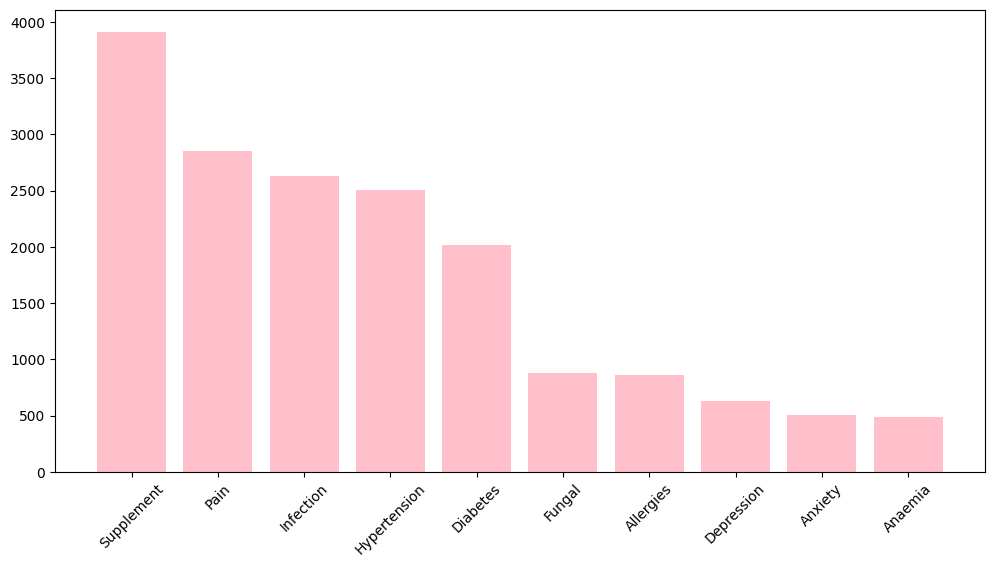

In [ ]:
print(f'Dataset has {len(df_des.Reason.unique())} unique groups')
print('*'*20)
print(f'And the top 10 counts are :')
print(df_des.Reason.value_counts().head(10))
print('*'*20)

c = df_des.Reason.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='pink')
plt.xticks(rotation=45)

Dataset has 301 unique names
********************
And the top 10 counts are :
treat type 2 diabetes mellitus when diet, physical exercise and weight reduction alone have not been able to control your blood sugar levels    671
reduces the diabetes                                                                                                                            671
reduces sugar level diabetes                                                                                                                    671
lower chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)                       578
lower high blood pressure (hypertension)                                                                                                        578
improves immunity                                                                                                                               493
urinary tract and kidneys         

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'treat type 2 diabetes mellitus when diet, physical exercise and weight reduction alone have not been able to control your blood sugar levels'),
  Text(1, 0, 'reduces the diabetes'),
  Text(2, 0, 'reduces sugar level diabetes'),
  Text(3, 0, 'lower\xa0chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)'),
  Text(4, 0, 'lower high blood pressure (hypertension)'),
  Text(5, 0, 'improves immunity'),
  Text(6, 0, 'urinary\xa0tract and kidneys'),
  Text(7, 0, 'infection during surgery'),
  Text(8, 0, 'infection \xa0of the chest in adults with chronic bronchitis'),
  Text(9, 0, 'used for treating high blood pressure (essential hypertension) in adults')])

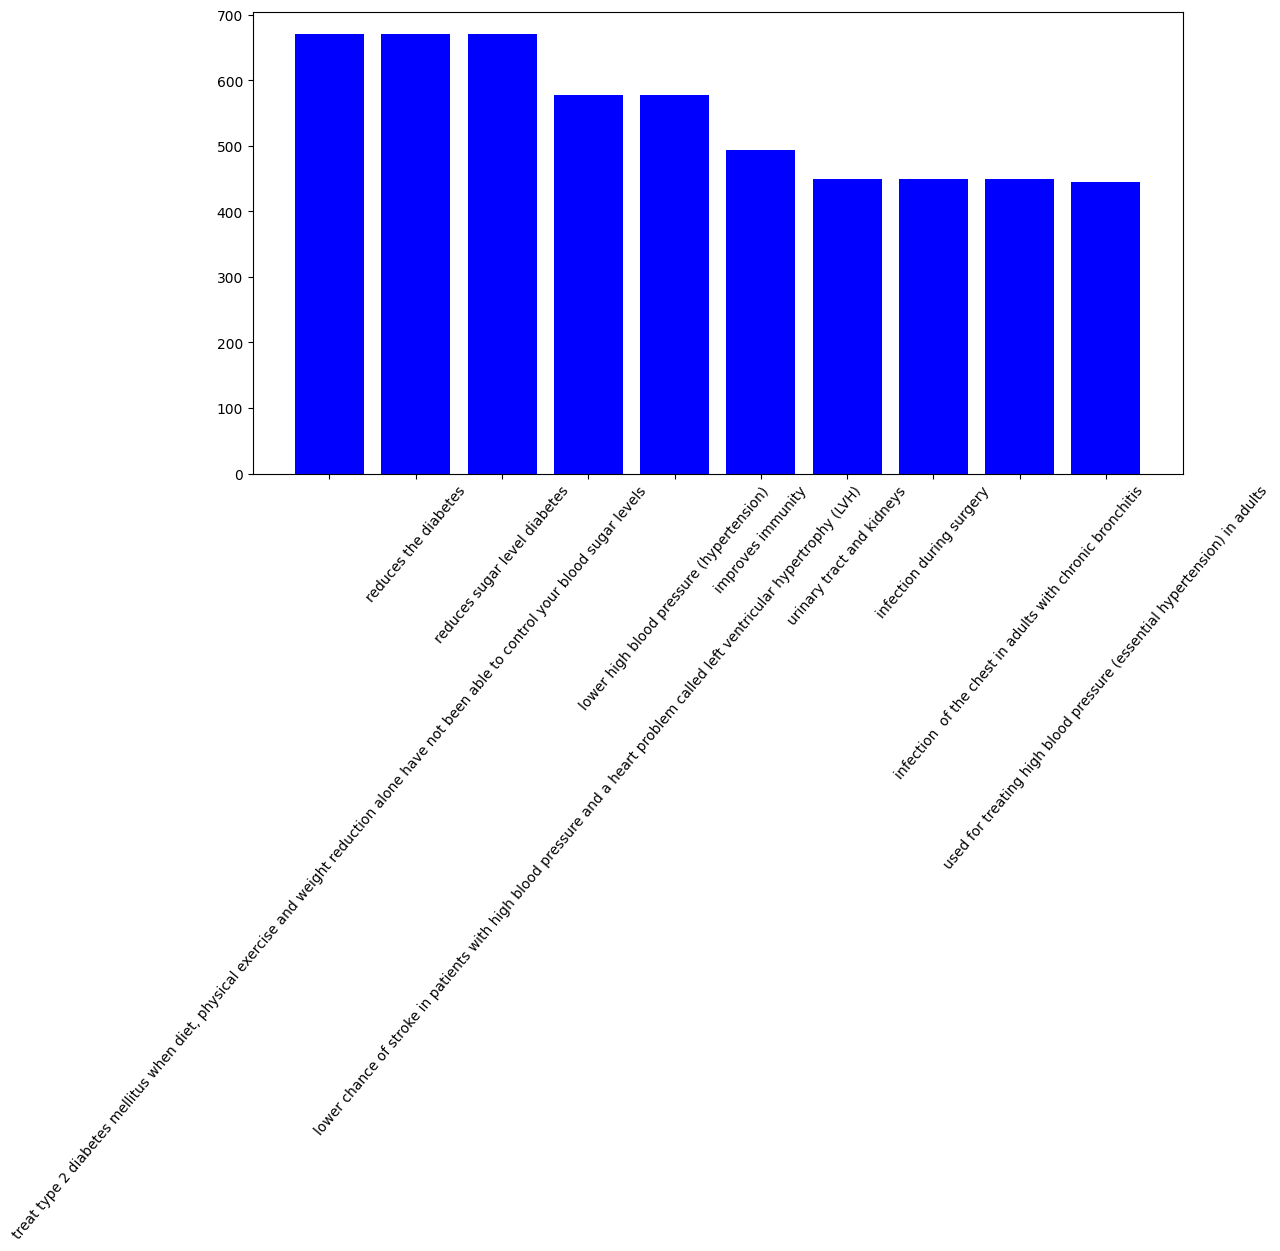

In [ ]:
print(f'Dataset has {len(df_des.Description.unique())} unique names')
print('*'*20)
print(f'And the top 10 counts are :')
print(df_des.Description.value_counts().head(10))
print('*'*20)

c = df_des.Description.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='blue')
plt.xticks(rotation=50)

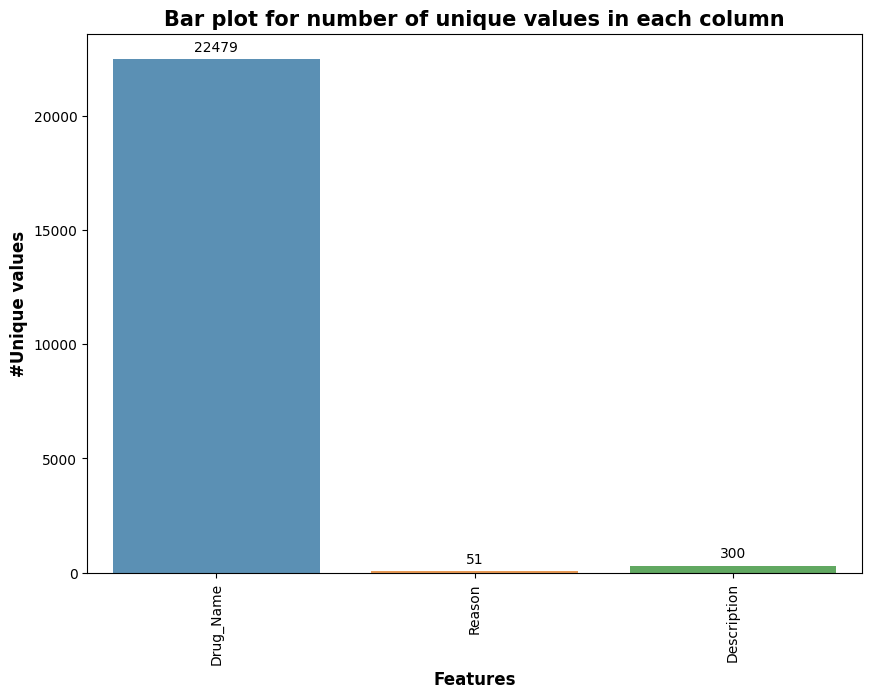

In [ ]:
unique_df = pd.DataFrame()
unique_df['Features'] = df_des.columns
unique=[]
for i in df_des.columns:
    unique.append(df_des[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(10,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

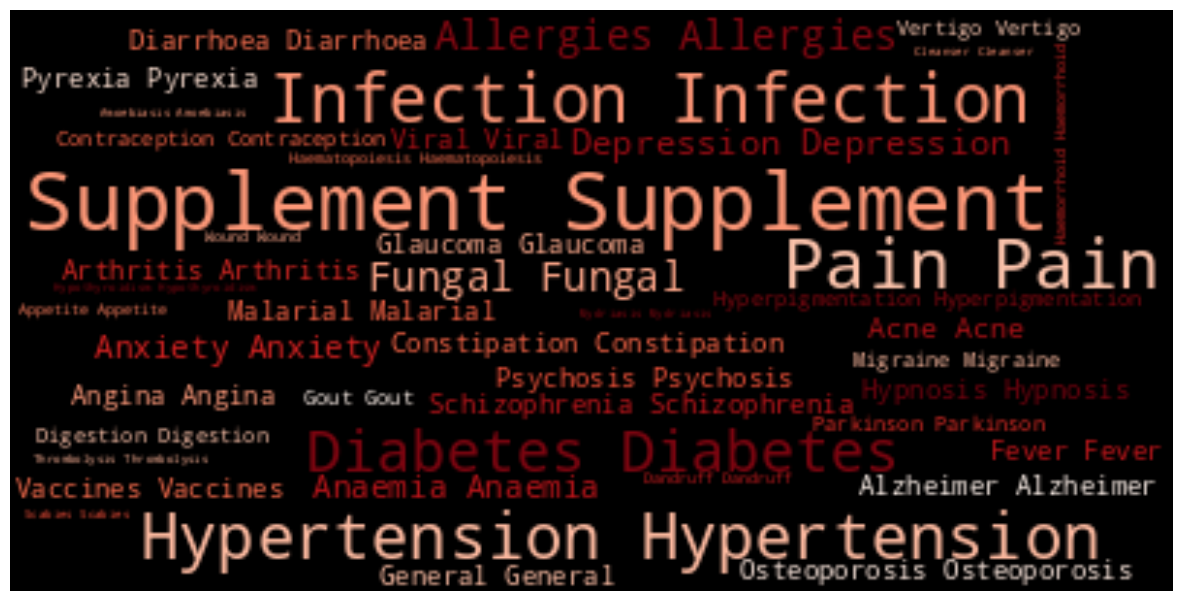

<Figure size 1000x600 with 0 Axes>

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(str(each) for each in df_des.Reason)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Reds', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [ ]:
df1 = df_rate.rename(columns={'Short-form':'form'})

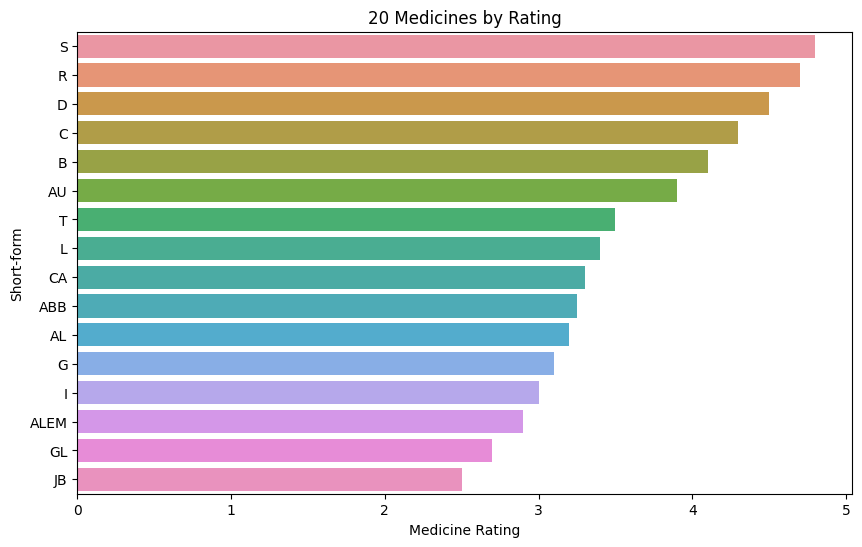

In [ ]:
top_medicine = df1.sort_values(by='Rating', ascending=False)[:20]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_medicine.form, x=top_medicine.Rating)
plt.xticks()
plt.xlabel('Medicine Rating')
plt.ylabel('Short-form')
plt.title('20 Medicines by Rating')
plt.show()

In [ ]:
df_med.columns.tolist()

['S.No', 'Company_Name', 'NSE_Symbol', 'Rating', 'Industry']

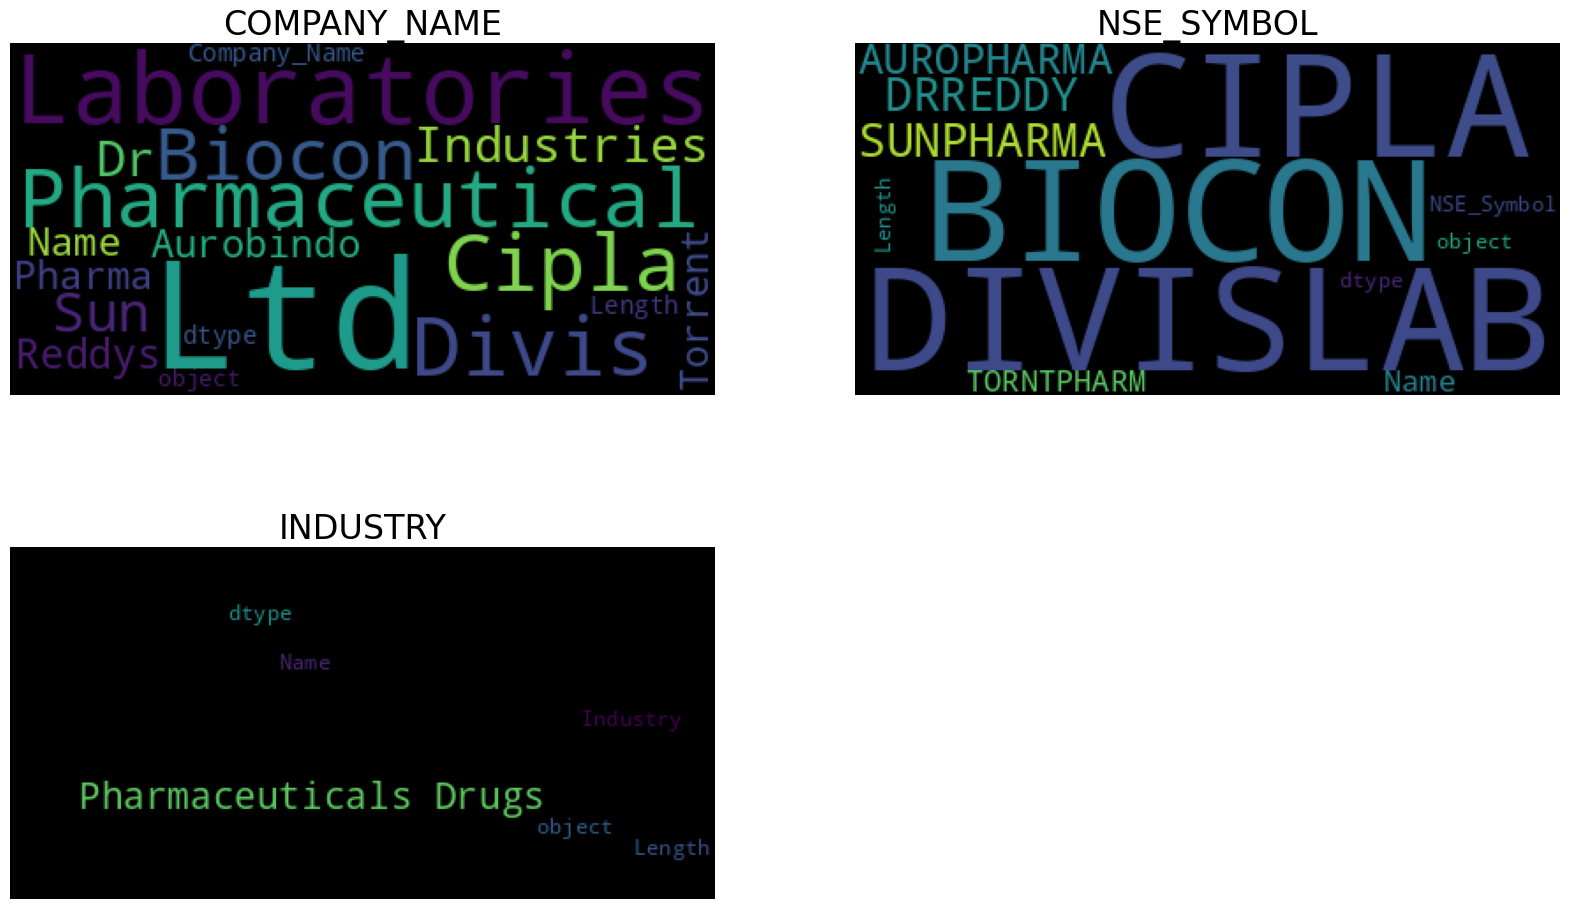

In [ ]:
text_cols = ['Company_Name','NSE_Symbol', 'Industry']

from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(df_med[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

_ = fig.delaxes(axes[3])

In [ ]:
s = (df_med.isna().sum()/df_med.shape[0]*100)<50
df_med_modified = df_med[s.index[s].tolist()]
print (df_med_modified.shape)
df_med_modified.head()

(22481, 5)


,S.No,Company_Name,NSE_Symbol,Rating,Industry
0,1,Sun Pharmaceutical Industries Ltd.,SUNPHARMA,S,Pharmaceuticals & Drugs
1,2,Dr. Reddys Laboratories Ltd.,DRREDDY,R,Pharmaceuticals & Drugs
2,3,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
3,4,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
4,5,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs


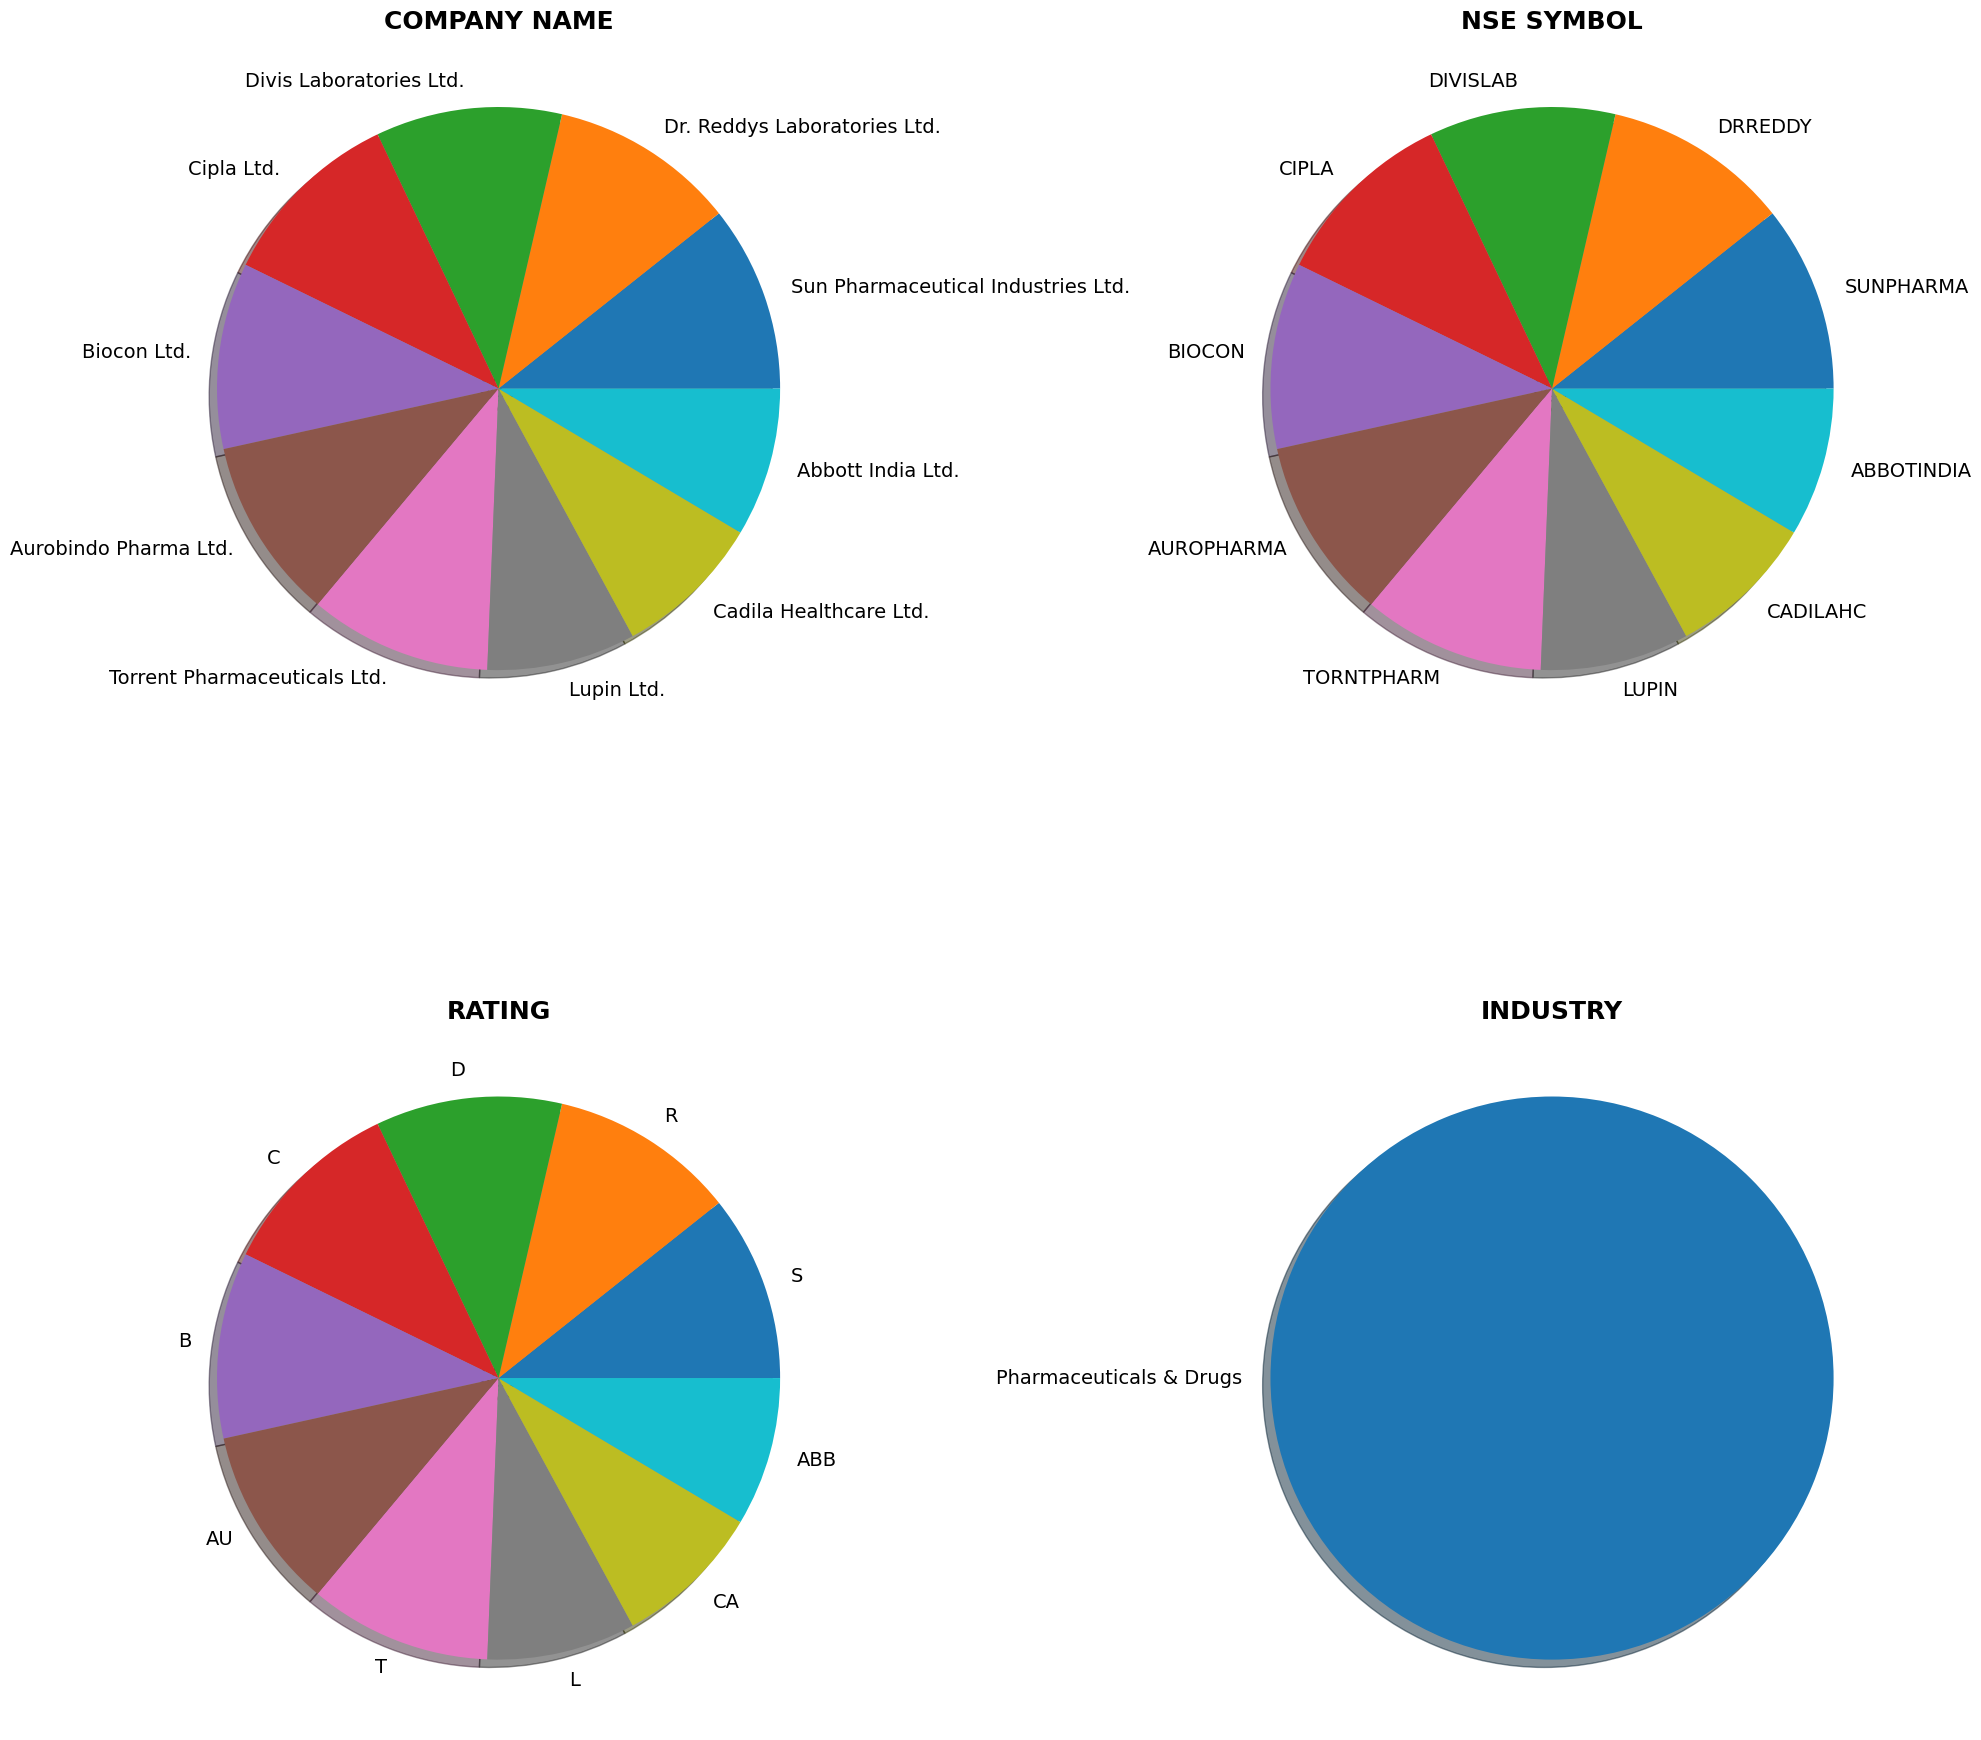

In [ ]:
plt.rcParams['font.size'] = 14
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for col, ax in zip(['Company_Name','NSE_Symbol','Rating', 'Industry'], ax.flat):
    dict_ = df_med_modified[col].value_counts().head(10).to_dict()
    if ('Not Available' in dict_.keys()):
        dict_.pop('Not Available')
    labels = []
    for i in dict_.keys():
        i = i.split(' ')
        if (len(i) > 6):
            i[math.ceil(len(i)/2)-1] += '\n'
            labels.append(' '.join(i))
        else:
            labels.append(' '.join(i))
    ax.pie(x=list(dict_.values()), labels=labels, shadow=True, startangle=0)

    col = (' '.join(col.split('_'))).upper()
    ax.set_title(col, weight='bold', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#eb3434','#eb3446','Akronim','Smokum',30,15
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h1>"""%string))


dhtml('Stay Postive....Positive Things Happens to You!!', fontcolor='purple')